In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import plotly
plotly.offline.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [100]:
C = pd.read_csv('state2.csv', delimiter=',')
df.head()
print(df.columns)

Index(['income', 'age', 'years_with_bank', 'nbr_children', 'gender_F ',
       'marital_status_1', 'marital_status_2', 'marital_status_3',
       'state_code_Midwest', 'state_code_Northeast', 'state_code_South'],
      dtype='object')


In [101]:
df=df.drop(['marital_status_1','marital_status_2','marital_status_3','state_code_Midwest','state_code_Northeast','state_code_South','gender_F '], axis=1)

In [102]:
df.head()

,income,age,years_with_bank,nbr_children
0,26150,46,5,1
1,6605,71,1,0
2,18548,38,8,0
3,47668,54,3,0
4,44554,59,9,2


In [103]:



#rescale df
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
df_scaled.head()

,income,age,years_with_bank,nbr_children
0,0.154185,0.184312,0.408539,0.258591
1,-0.726524,1.493070,-1.087435,-0.648298
2,-0.188366,-0.234490,1.530520,-0.648298
3,1.123798,0.603115,-0.339448,-0.648298
4,0.983479,0.864867,1.904514,1.165479


In [104]:
# import Kmeans from sklearn
from sklearn.cluster import KMeans


inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)

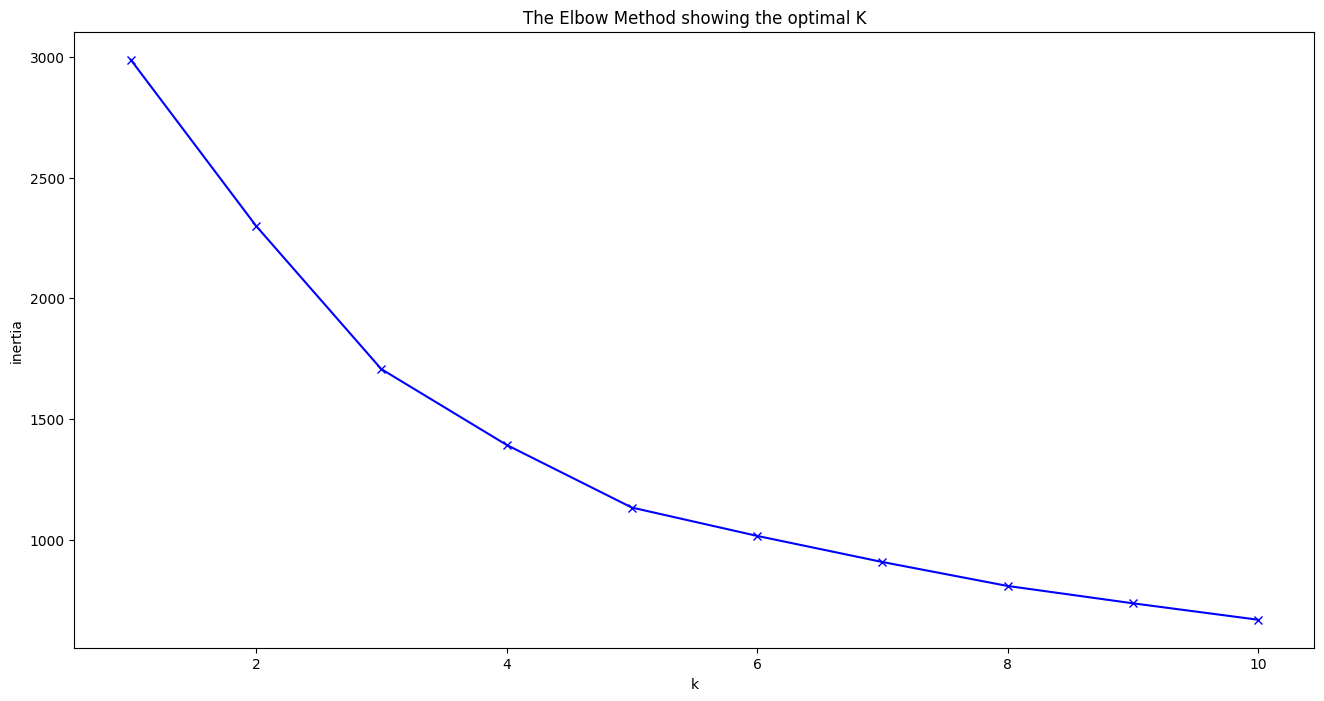

In [105]:
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [106]:
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    label=kmeanModel.predict(df_scaled)
    silhouettes.append(silhouette_score(df_scaled,label))

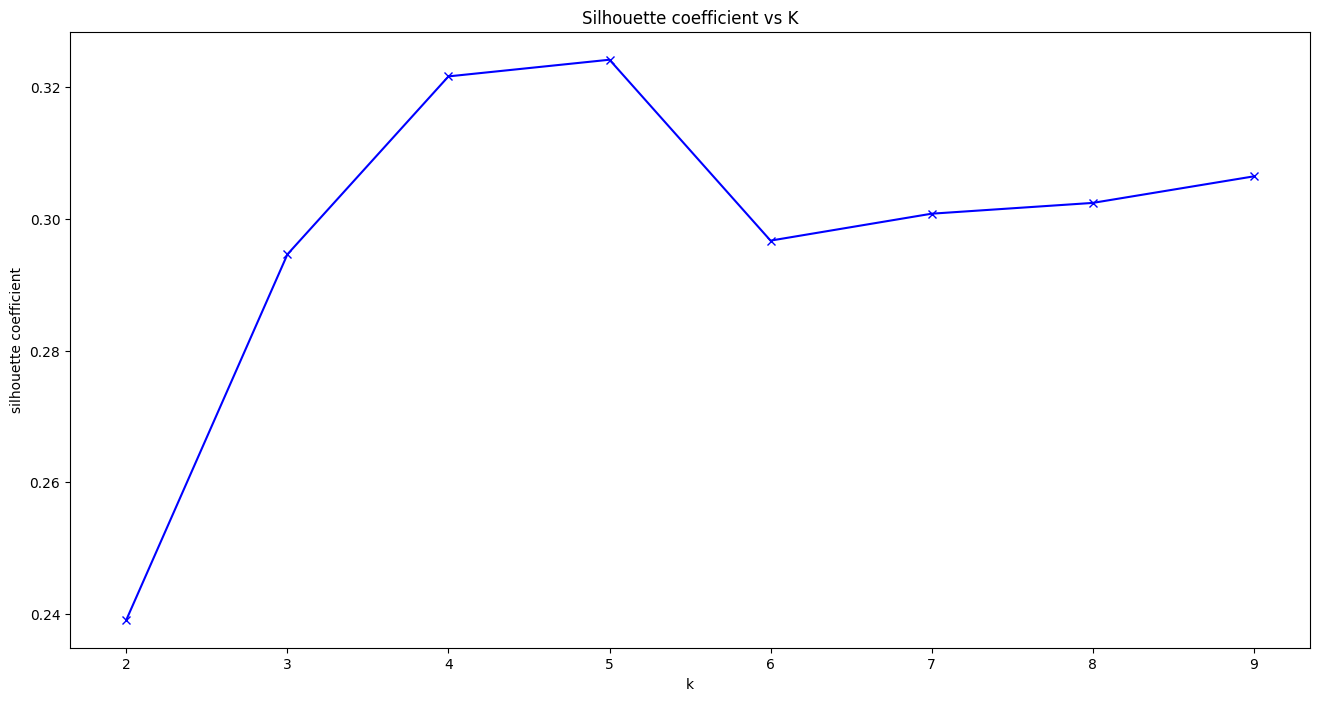

In [107]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [108]:
km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(df_scaled)

In [109]:
y_km

array([1, 2, 1, 2, 1, 3, 0, 1, 3, 1, 1, 0, 2, 0, 3, 0, 2, 0, 1, 0, 2, 2,
       4, 1, 3, 2, 0, 0, 1, 2, 2, 4, 3, 1, 2, 3, 0, 2, 1, 0, 0, 3, 2, 3,
       2, 2, 2, 0, 3, 4, 0, 0, 4, 1, 1, 2, 2, 1, 4, 0, 3, 0, 0, 2, 4, 0,
       1, 3, 0, 0, 2, 3, 1, 2, 1, 1, 0, 2, 0, 0, 4, 1, 2, 0, 1, 3, 2, 2,
       2, 1, 3, 0, 0, 2, 0, 2, 0, 2, 2, 3, 1, 1, 3, 2, 3, 2, 4, 1, 4, 1,
       0, 1, 1, 2, 3, 3, 3, 2, 4, 3, 4, 3, 1, 3, 0, 1, 0, 2, 3, 0, 1, 2,
       0, 2, 1, 0, 1, 3, 0, 2, 4, 4, 3, 0, 1, 0, 1, 1, 2, 3, 0, 2, 2, 4,
       2, 1, 0, 1, 3, 1, 1, 4, 0, 3, 3, 3, 2, 0, 2, 1, 2, 1, 1, 2, 2, 0,
       1, 4, 1, 2, 0, 0, 1, 0, 4, 2, 2, 3, 1, 3, 2, 3, 0, 0, 3, 0, 0, 0,
       3, 3, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 4, 1, 0, 3, 0, 3, 2, 3,
       1, 3, 3, 3, 0, 3, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 4, 3, 1, 1, 3, 0,
       2, 1, 2, 4, 4, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 2, 2, 2, 3, 1, 3, 3,
       0, 0, 2, 0, 3, 3, 3, 0, 0, 0, 1, 3, 2, 2, 2, 0, 0, 1, 1, 3, 3, 0,
       0, 3, 3, 0, 0, 3, 3, 2, 4, 0, 2, 3, 0, 0, 0,

In [110]:
df_scaled_with_clusters =df_scaled.copy()
df_scaled_with_clusters['label']=y_km
df_scaled_with_clusters.head()

,income,age,years_with_bank,nbr_children,label
0,0.154185,0.184312,0.408539,0.258591,1
1,-0.726524,1.493070,-1.087435,-0.648298,2
2,-0.188366,-0.234490,1.530520,-0.648298,1
3,1.123798,0.603115,-0.339448,-0.648298,2
4,0.983479,0.864867,1.904514,1.165479,1


In [111]:
df_scaled_with_clusters['label'].value_counts()

label
0    202
2    174
1    161
3    151
4     59
Name: count, dtype: int64

In [112]:
df_with_clusters =df.copy()
df_with_clusters['label']=y_km
df_with_clusters.head()

,income,age,years_with_bank,nbr_children,label
0,26150,46,5,1,1
1,6605,71,1,0,2
2,18548,38,8,0,1
3,47668,54,3,0,2
4,44554,59,9,2,1


In [113]:
cluster_0_means = df[df_scaled_with_clusters['label']==0].mean()
cluster_1_means = df[df_scaled_with_clusters['label']==1].mean()
cluster_2_means = df[df_scaled_with_clusters['label']==2].mean()
cluster_3_means = df[df_scaled_with_clusters['label']==3].mean()
means= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means])
means

,income,age,years_with_bank,nbr_children
0,5910.930693,19.440594,3.445545,0.099010
1,21114.198758,58.018634,6.968944,0.322981
2,20823.097701,56.166667,1.821839,0.183908
3,28320.059603,37.695364,3.370861,2.549669


In [116]:
cluster_0_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==0].mean()
cluster_1_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==1].mean()
cluster_2_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==2].mean()
cluster_3_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==3].mean()
cluster_4_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==4].mean()

means= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means,cluster_4_means])
means=means.drop('label',axis=1)
means

,income,age,years_with_bank,nbr_children
0,-0.757799,-1.206081,-0.172817,-0.558507
1,-0.072731,0.813492,1.144912,-0.355390
2,-0.085849,0.716541,-0.780073,-0.481514
3,0.251969,-0.250438,-0.200748,1.663968
4,2.401282,0.437191,0.281762,0.043397


pandas.core.series.Series

In [117]:
import plotly.graph_objects as go


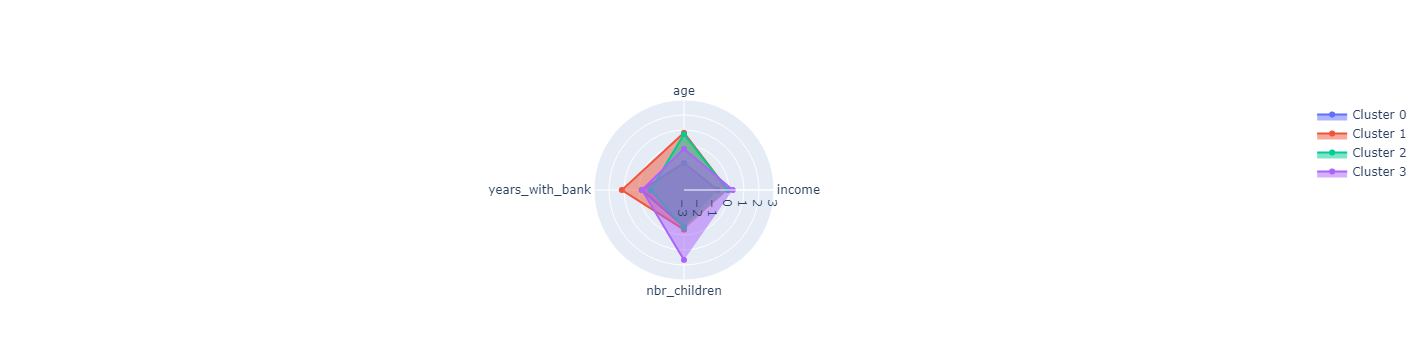

In [166]:

features = list(means.columns)

fig = go.Figure()

clusters=[0,1,2,3]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-3, 3]
        )),
      showlegend=True
    )

fig.show()

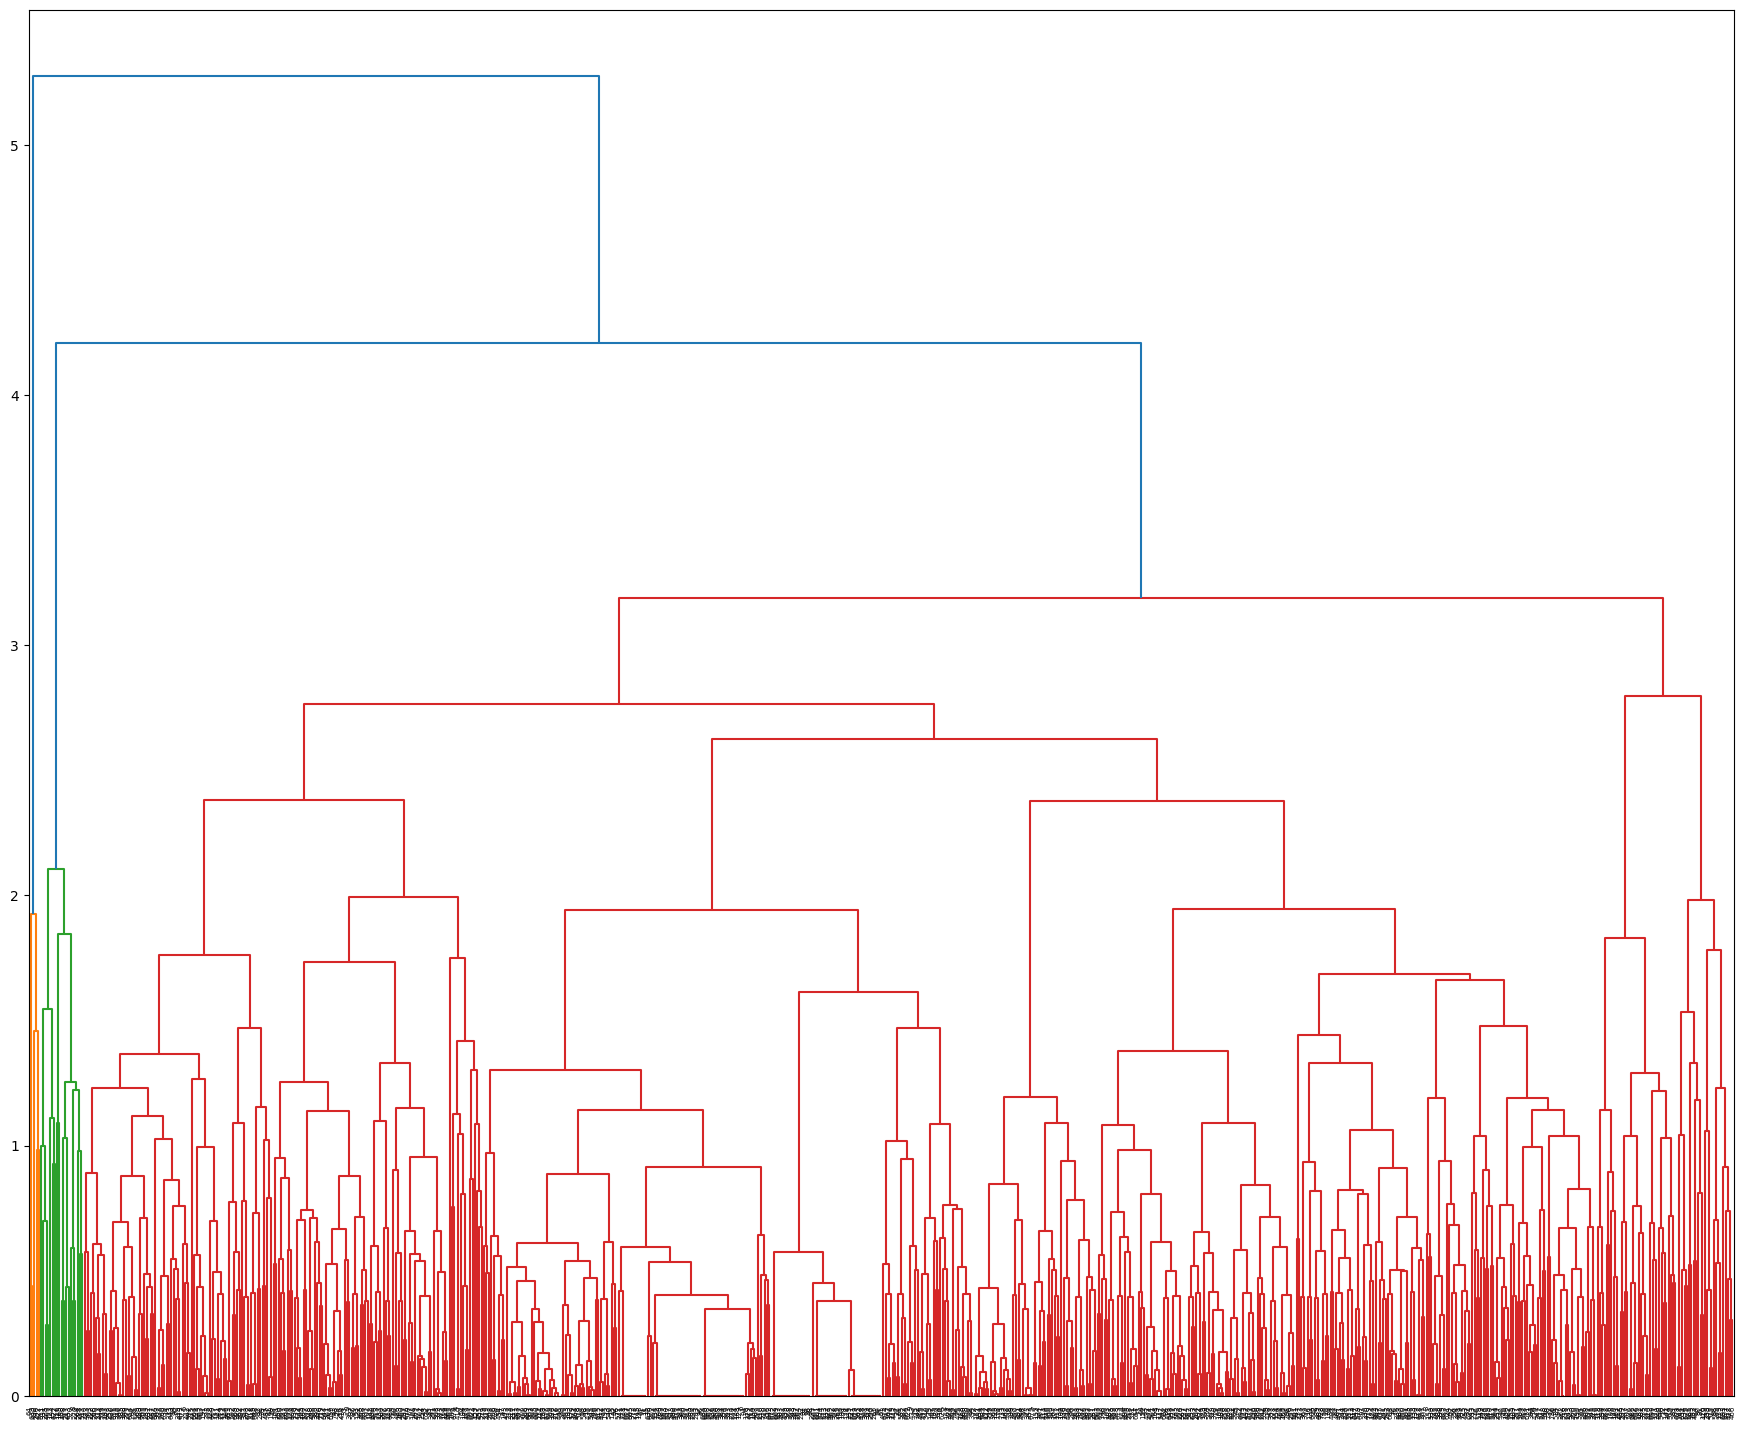

In [119]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'average' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

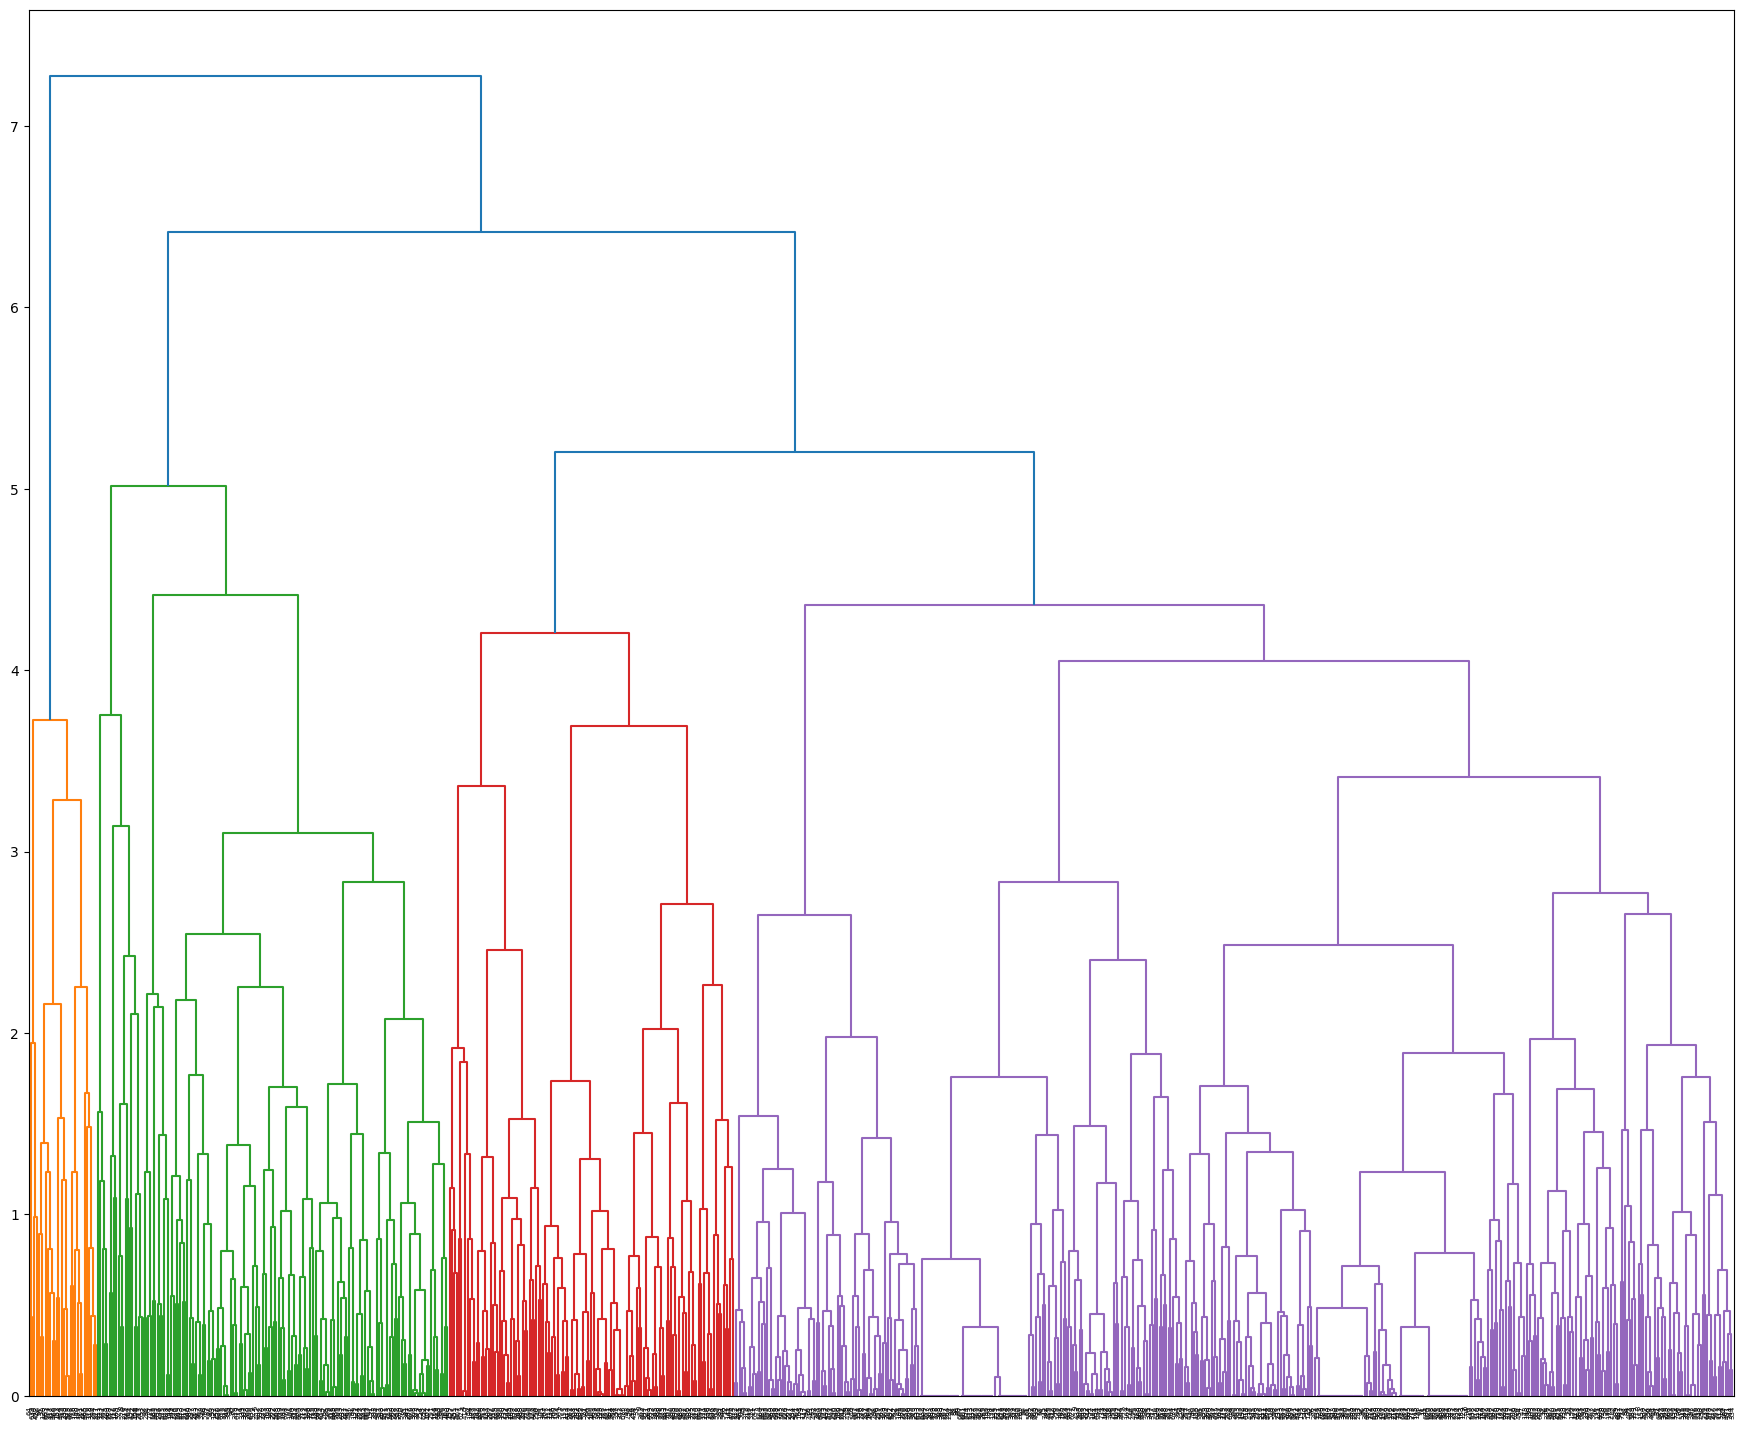

In [120]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'complete' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

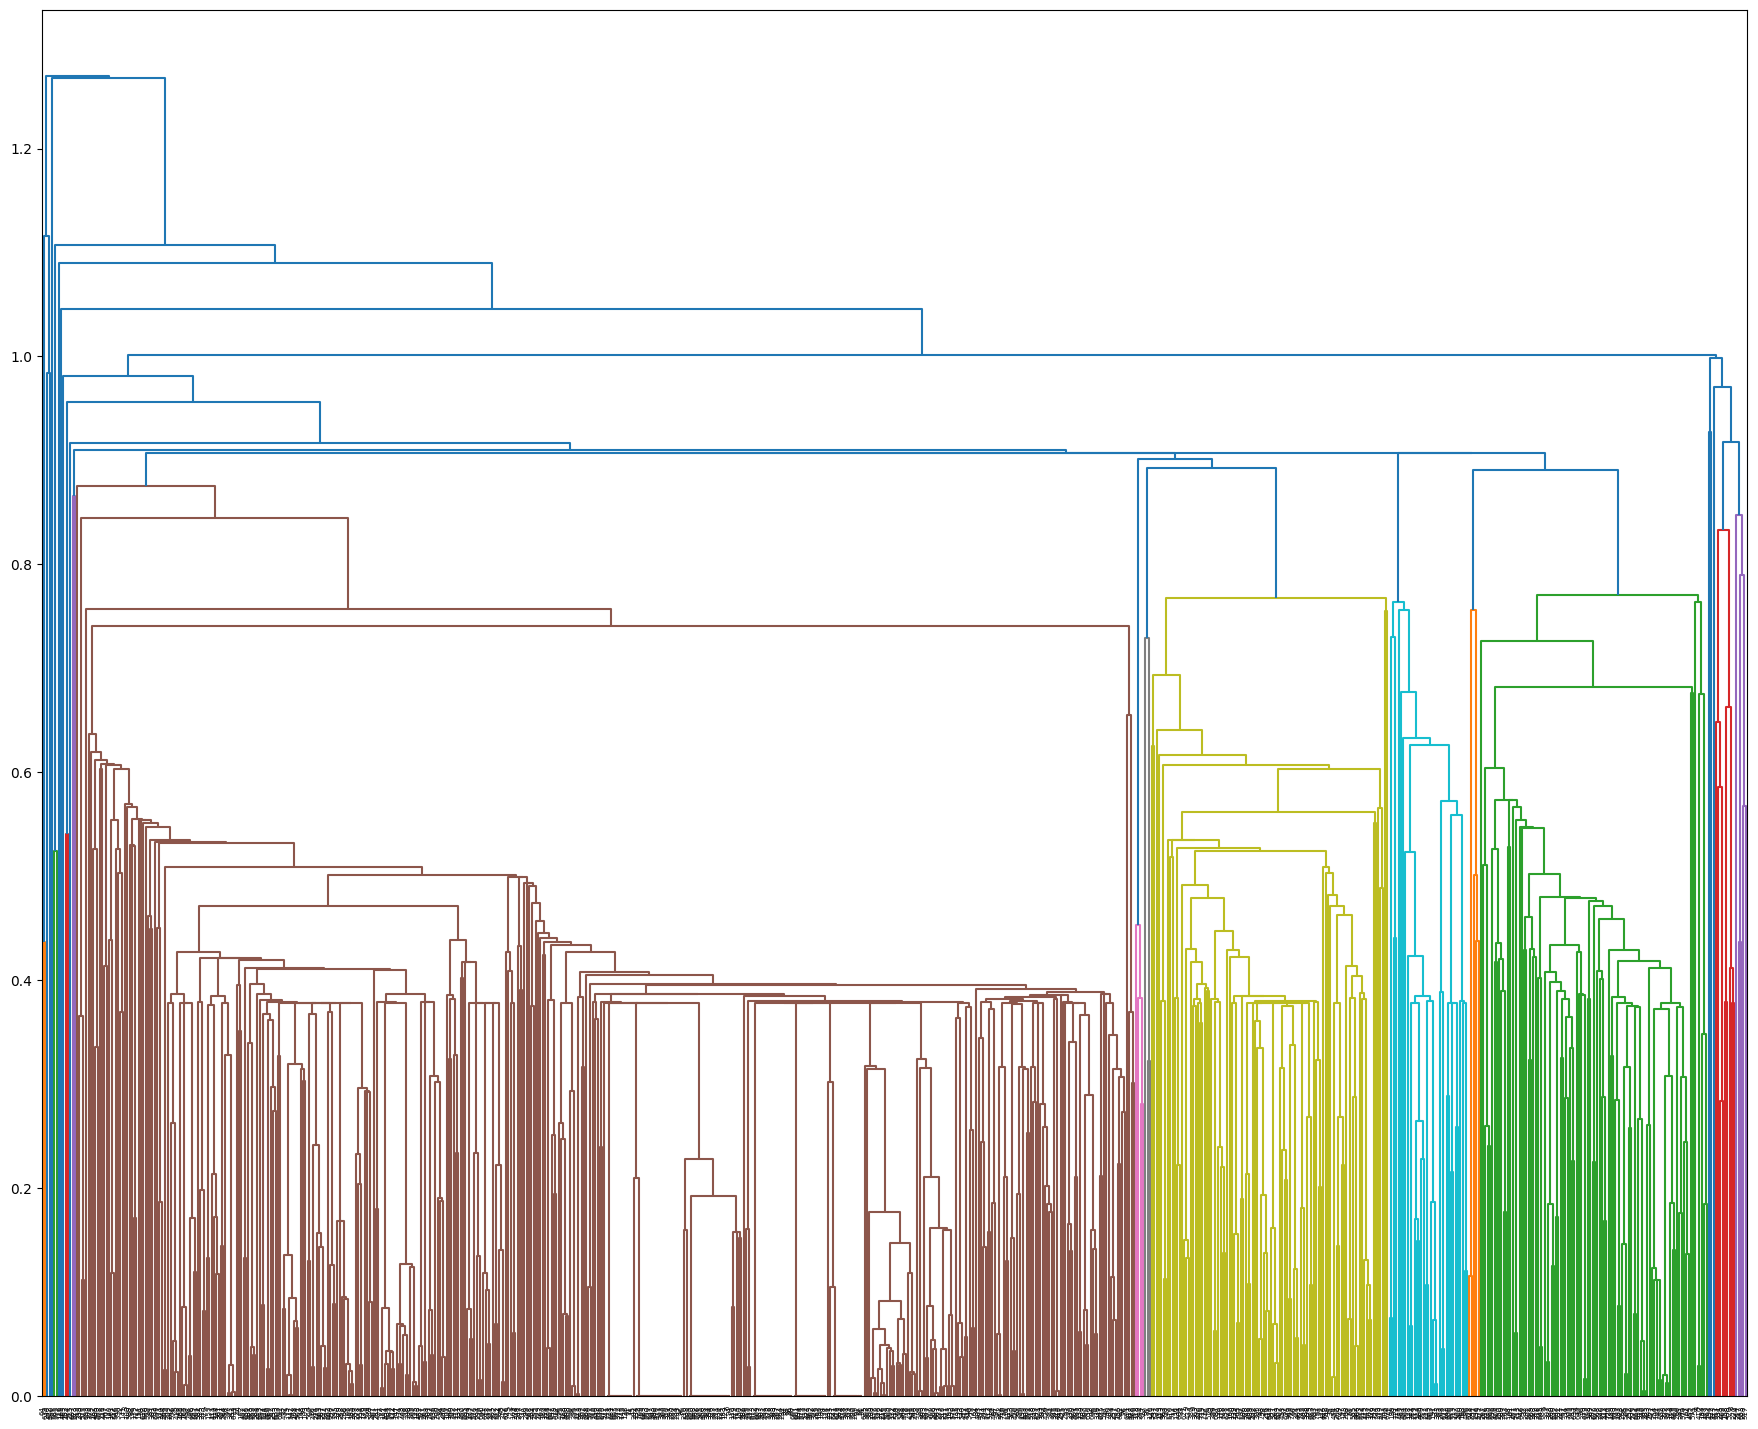

In [121]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'single' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

In [122]:
from sklearn.cluster import AgglomerativeClustering
# single
single = AgglomerativeClustering(n_clusters=3, linkage="single")
single_pred = single.fit_predict(df_scaled)

# complete
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(df_scaled)

# average
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(df_scaled)

In [123]:
# comparing the 3 linkage using silhouette score
single_silhouette = silhouette_score(df_scaled, single_pred)
complete_silhouette = silhouette_score(df_scaled, complete_pred)
avg_silhouette = silhouette_score(df_scaled, avg_pred)

print( "Scores: \nSingle:", single_silhouette,"\nComplete: ", complete_silhouette, "\nAverage: ", avg_silhouette)

Scores: 
Single: 0.3652656215782076 
Complete:  0.22951723129388854 
Average:  0.36495778303404414


In [45]:
avg_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [124]:
df2_with_clusters =df_scaled.copy()
df2_with_clusters['label']=avg_pred
df2_with_clusters.head()

,income,age,years_with_bank,nbr_children,label
0,0.154185,0.184312,0.408539,0.258591,0
1,-0.726524,1.493070,-1.087435,-0.648298,0
2,-0.188366,-0.234490,1.530520,-0.648298,0
3,1.123798,0.603115,-0.339448,-0.648298,0
4,0.983479,0.864867,1.904514,1.165479,0


In [125]:
cluster_0_means = df2_with_clusters[df2_with_clusters['label']==0].mean()
cluster_1_means = df2_with_clusters[df2_with_clusters['label']==1].mean()
cluster_2_means = df2_with_clusters[df2_with_clusters['label']==2].mean()
means2= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means])
means2=means2.drop('label',axis=1)
means2

,income,age,years_with_bank,nbr_children
0,-0.060014,-0.006842,0.002474,-0.091370
1,4.795522,0.676405,0.333740,0.258591
2,1.021707,0.082367,-0.181977,3.408836


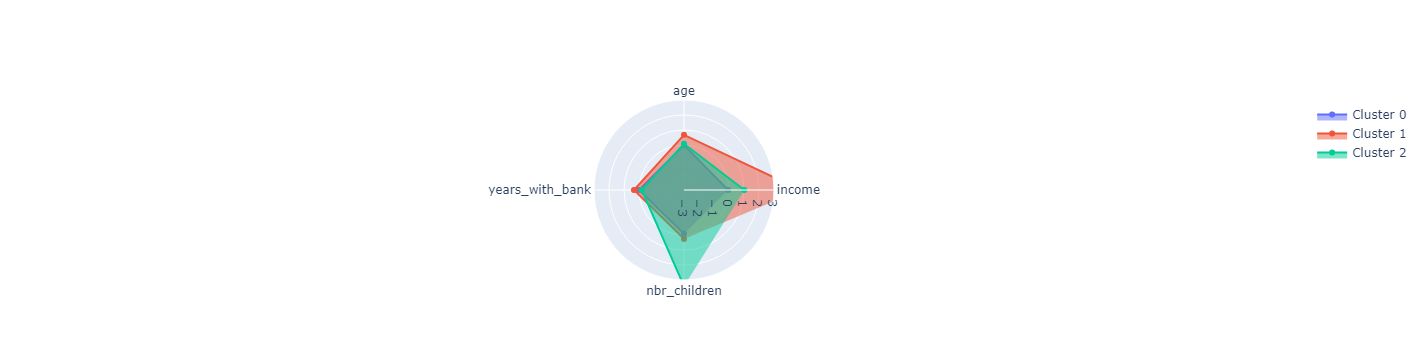

In [165]:

features = list(means2.columns)

fig = go.Figure()

clusters=[0,1,2]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means2.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-3, 3]
        )),
      showlegend=True
    )

fig.show()

In [127]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

In [147]:
# Compute DBSCAN
db = DBSCAN(eps=0.9, min_samples=10)
db.fit(df_scaled) #algorithm runs

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
#core_samples_mask will be True if the data point was a core point. Otherwise false.

labels = db.labels_
#actual cluster label. If outliers, gets assigned -1

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) #number of unique clusters labels (excluding -1)
n_noise_ = list(labels).count(-1) #counts how many outliers there are (labels with -1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)








Estimated number of clusters: 4
Estimated number of noise points: 72


In [148]:
df3_with_clusters =df_scaled.copy()
df3_with_clusters['label']=labels
df3_with_clusters.head()

,income,age,years_with_bank,nbr_children,label
0,0.154185,0.184312,0.408539,0.258591,0
1,-0.726524,1.493070,-1.087435,-0.648298,1
2,-0.188366,-0.234490,1.530520,-0.648298,1
3,1.123798,0.603115,-0.339448,-0.648298,1
4,0.983479,0.864867,1.904514,1.165479,2


In [150]:
cluster_0_means = df3_with_clusters[df3_with_clusters['label']==0].mean()
cluster_1_means = df3_with_clusters[df3_with_clusters['label']==1].mean()
cluster_2_means = df3_with_clusters[df3_with_clusters['label']==2].mean()
cluster_3_means = df3_with_clusters[df3_with_clusters['label']==3].mean()
means3= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means])
means3=means3.drop('label',axis=1)
means3

,income,age,years_with_bank,nbr_children
0,0.113942,0.112140,0.136214,0.258591
1,-0.366199,0.010355,0.007058,-0.648298
2,0.126451,-0.179959,-0.101806,1.165479
3,0.040518,-0.478792,-0.491816,2.072368


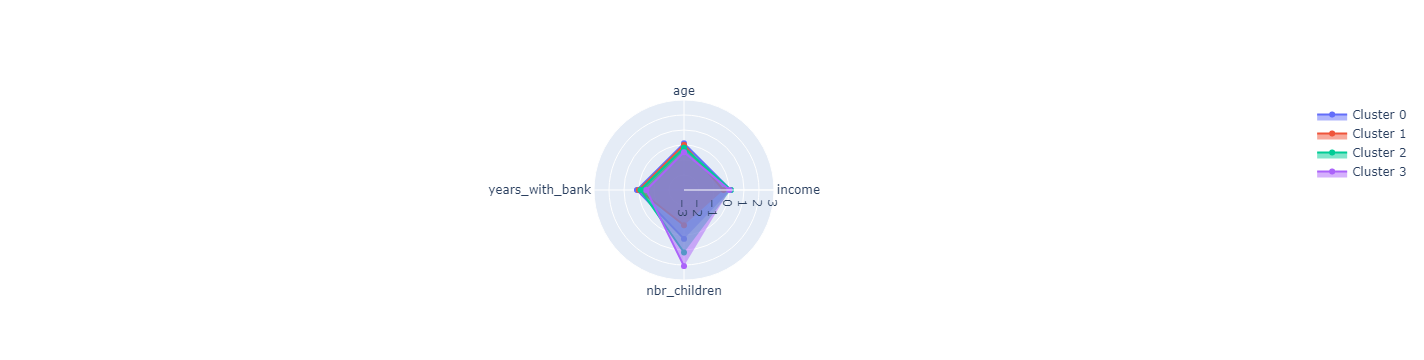

In [167]:
features = list(means3.columns)

fig = go.Figure()

clusters=[0,1,2,3]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means3.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-3, 3]
        )),
      showlegend=True
    )

fig.show()

In [153]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(df_scaled)


In [154]:
explained_variance= np.insert(pca.explained_variance_ratio_,0,0)

In [155]:
# preparing the cumulative variance
cumulative_variance=np.cumsum(np.round(explained_variance, decimals=3))

In [157]:
pc_df=pd.DataFrame(['','PC1','PC2','PC3','PC4',], columns=['PC'])
explained_variance_df= pd.DataFrame(explained_variance,columns=['Explained Variance'])
cumulative_variance_df= pd.DataFrame(cumulative_variance,columns=['Cumulative Variance'])
df_explained_variance= pd.concat([pc_df,explained_variance_df,cumulative_variance_df],axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.343729,0.344
2,PC2,0.293854,0.638
3,PC3,0.214711,0.853
4,PC4,0.147707,1.001


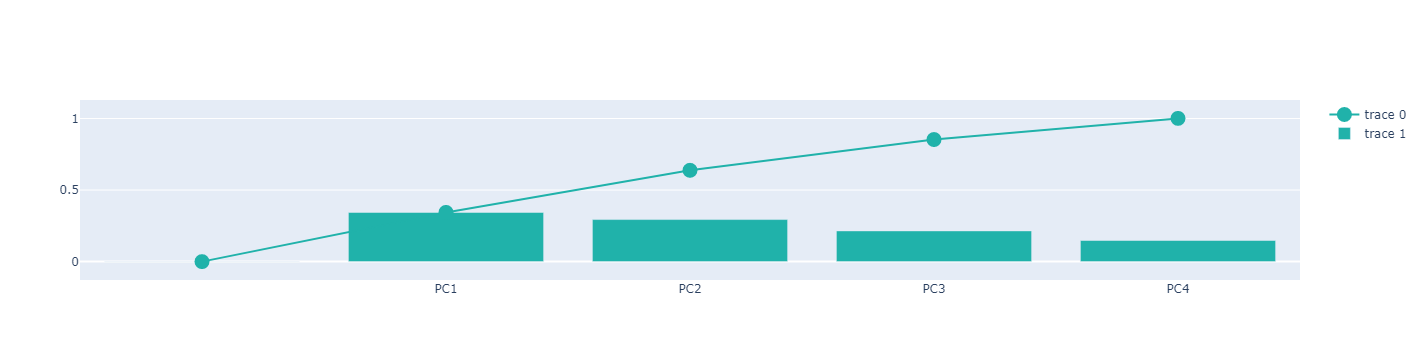

In [158]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(
    go.Scatter(
        x= df_explained_variance['PC'],
        y= df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="lightSeaGreen")
    ))
fig.add_trace(
    go.Bar(
        x = df_explained_variance['PC'],
        y = df_explained_variance['Explained Variance'],
        marker=dict(color="lightSeaGreen")
    ))
fig.show()

In [159]:
pca=PCA(n_components=4).set_output(transform="pandas")
df_pca = pca.fit_transform(df_scaled)
df_pca.head()

,pca0,pca1,pca2,pca3
0,0.427653,-0.120639,0.296278,-0.079347
1,-0.295419,-0.670501,-1.644449,-1.057756
2,-0.074039,-1.208187,1.055698,0.523023
3,0.722583,-0.251491,-1.025002,0.725384
4,2.161632,-0.530545,1.309737,-0.176623


In [160]:
df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['label'] = df_scaled_with_clusters['label']
df_pca_with_clusters.head()

,pca0,pca1,pca2,pca3,label
0,0.427653,-0.120639,0.296278,-0.079347,1
1,-0.295419,-0.670501,-1.644449,-1.057756,2
2,-0.074039,-1.208187,1.055698,0.523023,1
3,0.722583,-0.251491,-1.025002,0.725384,2
4,2.161632,-0.530545,1.309737,-0.176623,1


In [161]:
# to visualize centroids in PCA space
pca_centroids = pca.transform(km.cluster_centers_)
pca_centroids

,pca0,pca1,pca2,pca3
0,-1.433581,0.147705,0.366021,0.399682
1,0.564660,-1.277658,0.361583,-0.148964
2,-0.106651,-0.223977,-1.106054,-0.276176
3,0.666529,1.343600,0.576666,-0.594333
4,1.976008,0.202626,-0.453801,1.373668


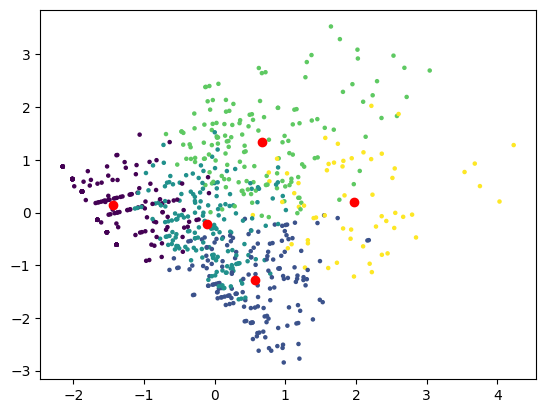

In [162]:
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca1'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca1'], c='red')
plt.show()

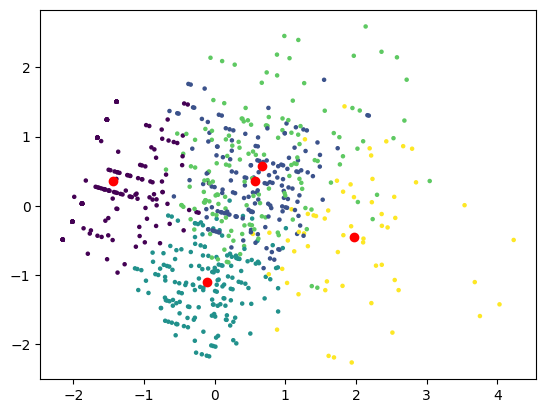

In [163]:
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca2'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca2'], c='red')
plt.show()

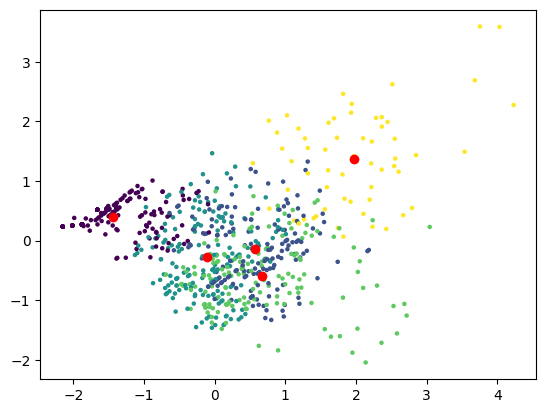

In [164]:
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca3'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca3'], c='red')
plt.show()